In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'/Users/darsini/Documents/Git Hub Analysis/Google Playtsore Apps Data'

#### Reading the datasets

In [4]:
playstore = pd.read_csv('googleplaystore.csv')
ratings = pd.read_csv('googleplaystore_user_reviews.csv')

In [5]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
print("The number of rows and columns in playstore is", playstore.shape)
print("The number of unique apps in playstore is",playstore['App'].nunique())

The number of rows and columns in playstore is (10840, 13)
The number of unique apps in playstore is 9659


In [7]:
ratings.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
print("The number of rows and columns in playstore is", ratings.shape)
print("The number of unique apps in playstore is",ratings['App'].nunique())

The number of rows and columns in playstore is (64295, 5)
The number of unique apps in playstore is 1074


#### Data Cleaning

In [9]:
## Remove '+' and ',' from 'Installs' column
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
playstore['Installs'] = playstore['Installs'].apply(lambda x: str(x))

In [10]:
## 'Size' column - convert Mbs to kbs
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
playstore['Size'] = playstore['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [11]:
## Remove "$" from "Price" column 
playstore['Price'] = playstore['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

In [12]:
## Convert the column types to numeric values
playstore['Size'] = playstore['Size'].apply(lambda x: float(x))
playstore['Installs'] = playstore['Installs'].apply(lambda x: float(x))
playstore['Price'] = playstore['Price'].apply(lambda x: float(x))
playstore['Reviews'] = playstore['Reviews'].apply(lambda x: int(x))

In [13]:
## Display the dtypes of all the features in our dataset
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Handling Null values

In [14]:
playstore_na = (playstore.isnull().sum() / len(playstore)) * 100
playstore_na

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64

In [15]:
## Drop the Null values in Rating column
playstore = playstore.dropna()

#### Dealing with Duplicates

In [16]:
## Drop the duplicates from the "App" column
playstore.drop_duplicates(subset='App', inplace=True)
print("The number of rows and columns in playstore after dropping the duplicates is",playstore.shape)

The number of rows and columns in playstore after dropping the duplicates is (7023, 13)


#### Basic EDA

Text(0.5, 1.02, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

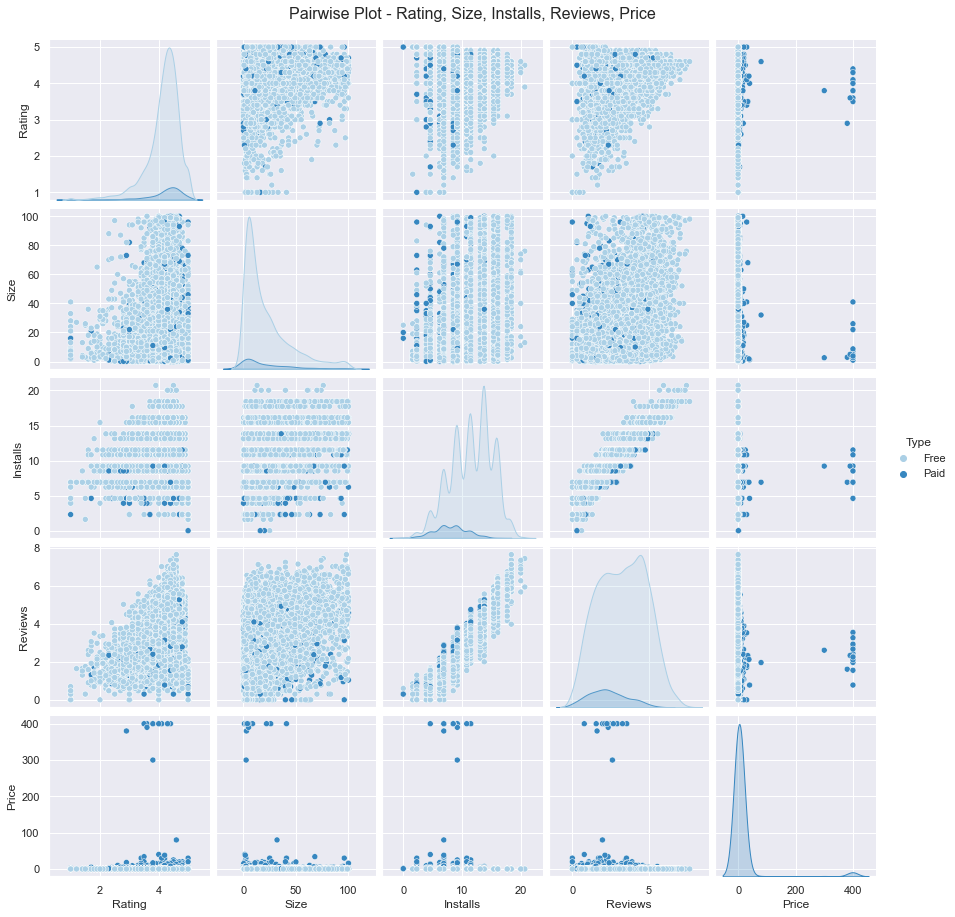

In [17]:
r = playstore['Rating'].dropna()
s = playstore['Size'].dropna()
i = playstore['Installs'].dropna()
rev = playstore['Reviews'].dropna()
t = playstore['Type'].dropna()
price = playstore['Price']

p = sns.pairplot(pd.DataFrame(list(zip(r, s, np.log(i), np.log10(rev), price, t)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type', palette="Blues")
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price", y=1.02, fontsize=16)

#### Android market breakdown

#### Which category has the highest share of (active) apps in the market?

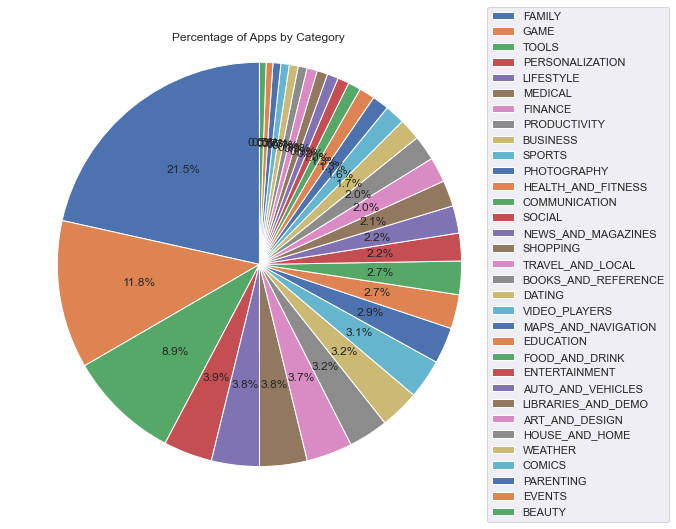

In [18]:
# Group the DataFrame by 'Category' and count the number of apps in each category
category_counts = playstore['Category'].value_counts()

# Get the unique categories and their corresponding counts
categories = category_counts.index
counts = category_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, text, _ = plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)

# Set the percentage labels to white color
for t in text:
    t.set_color('white')

# Set the legend to display the category index towards the right
plt.legend(patches, categories, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Apps by Category')
plt.show()



#### Sizing Strategy

#### How does the size of the app affect the ratings and number of installs?

Text(0.5, 1.02, 'Rating vs Size of Apps')

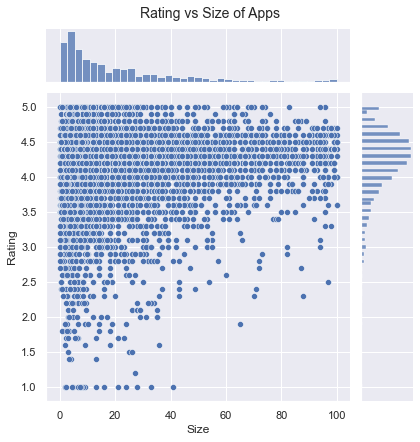

In [19]:
sns.set_style("darkgrid")
ax = sns.jointplot(playstore['Size'], playstore['Rating'])
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

In [20]:
## Sizing distribution of top rated apps (>= 4.5) 
playstore_top_rated = playstore[playstore["Rating"]>=4.5]
sizing_distribution = [go.Histogram(x = playstore_top_rated.Size,)]
print('Average size of top rated apps = ', np.mean(playstore_top_rated['Size']))
#plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')
layout =dict(title = 'Average Size of top rated apps',
             xaxis = dict(title = 'Size of Apps'),
             yaxis = dict(title = 'Distribution'),
             )
sizing_distribution = dict(data = sizing_distribution, layout = layout)
plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')

Average size of top rated apps =  21.79914529331518


Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too bulky.

#### Which categories have the bulkiest apps and how are they rated?

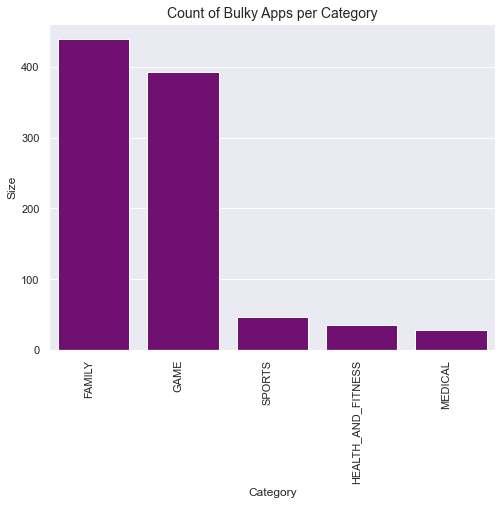

In [21]:
bulky_apps = playstore[playstore["Size"]>40]
group_category = bulky_apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, color = "Purple")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Bulky Apps per Category',size = 14)
plt.savefig("Count_bulky")

In [22]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(playstore.Category))))]

subset_df = playstore[playstore.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]

layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

Most bulky apps ( >50MB) belong to the Game and Family category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

#### How do the sizes of paid apps and free apps vary?

In [23]:
paid_apps = playstore[playstore.Type == 'Paid']

data = [{
    'x' : paid_apps['Rating'],
    'type':'scatter',
    'y' : paid_apps['Size'],
    'mode' : 'markers',
    'text' : playstore['Size'],
    } for t in set(paid_apps.Type)]


layout = {'title':"Rating vs Size for Paid Apps", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(255,255,255)'}

plotly.offline.iplot({'data': data, 'layout': layout})

Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky. Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.

#### Pricing Strategy

#### How do App prices affect rating and number of installs?

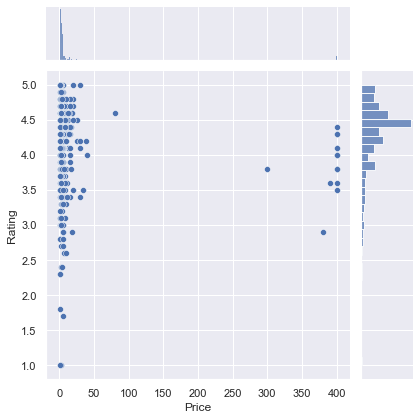

In [24]:
paid_apps = playstore[playstore.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

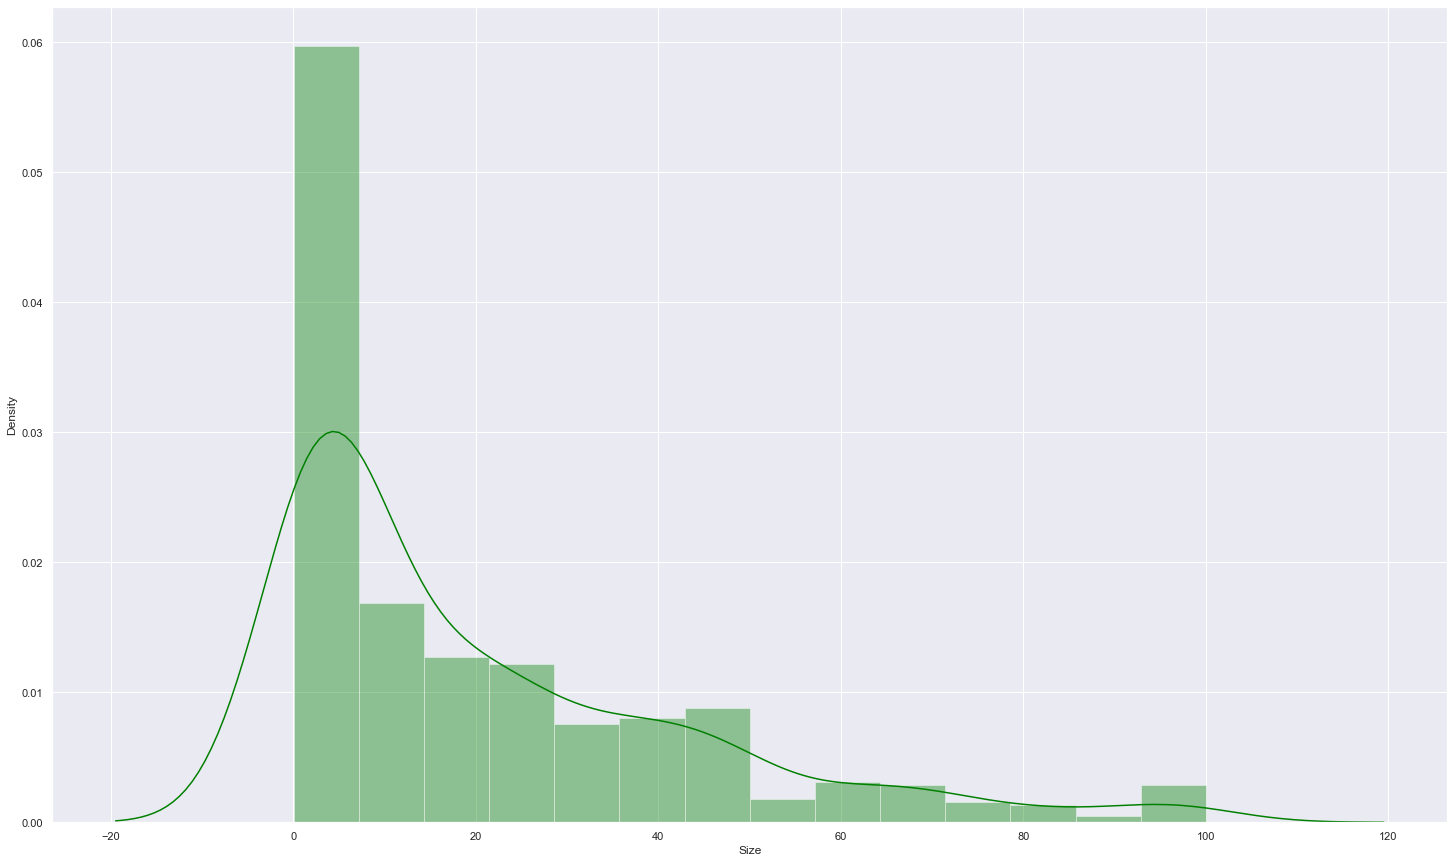

In [25]:
size_paid_apps = paid_apps['Size'].dropna()
ax = sns.distplot(size_paid_apps, color="green")

Most top rated apps are optimally priced between ~1 𝑡𝑜 30. There are only a very few apps priced above 20$.



#### Pricing trend across categories

Text(0.5, 1.0, 'App pricing trend across categories')

<Figure size 864x432 with 0 Axes>

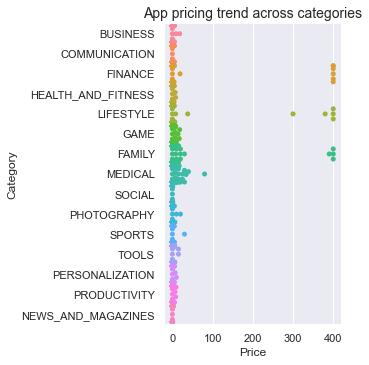

In [26]:
top_categories = playstore[playstore.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS','PRODUCTIVITY','PERSONALIZATION','SPORTS','COMMUNICATION',
                                                        'HEALTH_AND_FITNESS','NEWS_AND_MAGAZINES','SOCIAL'])]

plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.catplot(x="Price", y="Category", kind="swarm", data=top_categories)
plt.title('App pricing trend across categories',size = 14)

#### Rating Distribution

In [27]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = playstore.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(playstore['Rating']))
plotly.offline.iplot(rating_distribution, filename='overall_rating_distribution')

Average app rating =  4.160857183539798


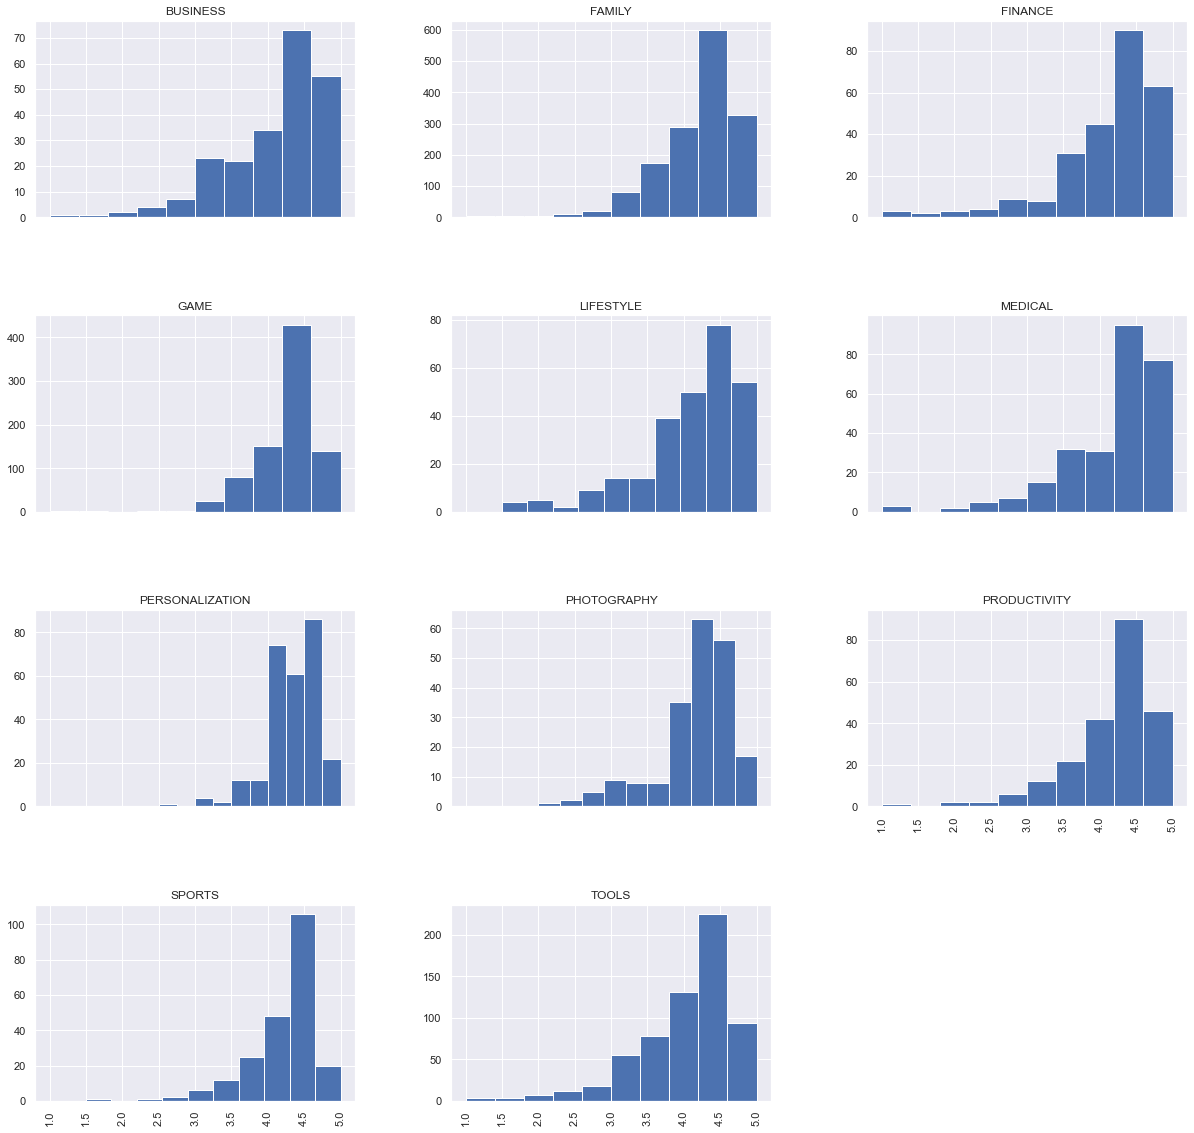

In [28]:
top_categories = playstore.groupby("Category").filter(lambda x: len(x) > 200).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Category'], sharex=True, figsize=(20,20))

[Text(0, 0, 'BUSINESS'),
 Text(1, 0, 'COMMUNICATION'),
 Text(2, 0, 'FINANCE'),
 Text(3, 0, 'HEALTH_AND_FITNESS'),
 Text(4, 0, 'LIFESTYLE'),
 Text(5, 0, 'GAME'),
 Text(6, 0, 'FAMILY'),
 Text(7, 0, 'MEDICAL'),
 Text(8, 0, 'PHOTOGRAPHY'),
 Text(9, 0, 'SPORTS'),
 Text(10, 0, 'TOOLS'),
 Text(11, 0, 'PERSONALIZATION'),
 Text(12, 0, 'PRODUCTIVITY')]

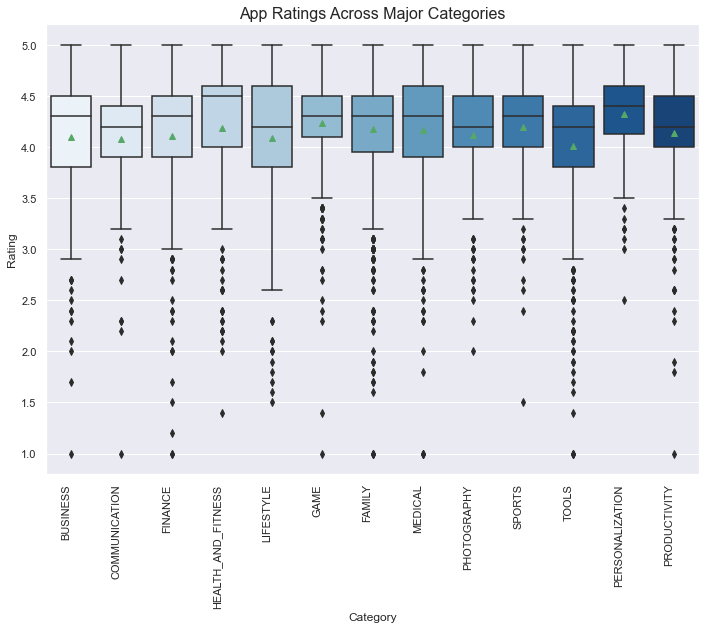

In [29]:
topcat = playstore.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=topcat, palette='Blues', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

The rating distribution revealed that most apps perform reasonably well with an average rating of 4.17. Broke down the average rating by category to check if any category performs exceedingly good or bad. Conducted a One-way Anova Test and confirmed that the average ratings across categories is statistically different. The Health and Fitness and Books and Reference produce the best apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating apps have a rating lower than the average.

#### Sentiment Analysis - User Reviews

In [30]:
## Merge the two datasets
merged_df = playstore.merge(ratings, on = "App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [31]:
## Drop the NA values
merged_df = merged_df.dropna(subset=['Translated_Review'])

In [32]:
## let's see the distribution of postive, neg reviews in each category
sentiment_count = merged_df.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        345
1    AUTO_AND_VEHICLES        164
2               BEAUTY        302
3  BOOKS_AND_REFERENCE        275
4             BUSINESS        655
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   58
1     ART_AND_DESIGN   Neutral   54
2     ART_AND_DESIGN  Positive  233
3  AUTO_AND_VEHICLES  Negative   11
4  AUTO_AND_VEHICLES   Neutral   20


In [33]:
## we need to normalize it before plotting
new_df = sentiment_count.merge(sentiment_sum, on = "Category")
new_df["normalized_sentiment_counts"] = new_df["App"]/new_df["Sentiment_y"]
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,normalized_sentiment_counts
0,ART_AND_DESIGN,Negative,58,345,0.168116
1,ART_AND_DESIGN,Neutral,54,345,0.156522
2,ART_AND_DESIGN,Positive,233,345,0.675362
3,AUTO_AND_VEHICLES,Negative,11,164,0.067073
4,AUTO_AND_VEHICLES,Neutral,20,164,0.121951


In [34]:
sentiment_count_2 = merged_df.groupby(["Category","Sentiment","Installs"]).agg({'App': 'count'}).reset_index()
sentiment_sum_2 =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
sentiment_count_2.head()

,Category,Sentiment,Installs,App
0,ART_AND_DESIGN,Negative,100000.0,23
1,ART_AND_DESIGN,Negative,500000.0,22
2,ART_AND_DESIGN,Negative,1000000.0,10
3,ART_AND_DESIGN,Negative,10000000.0,3
4,ART_AND_DESIGN,Neutral,100000.0,28


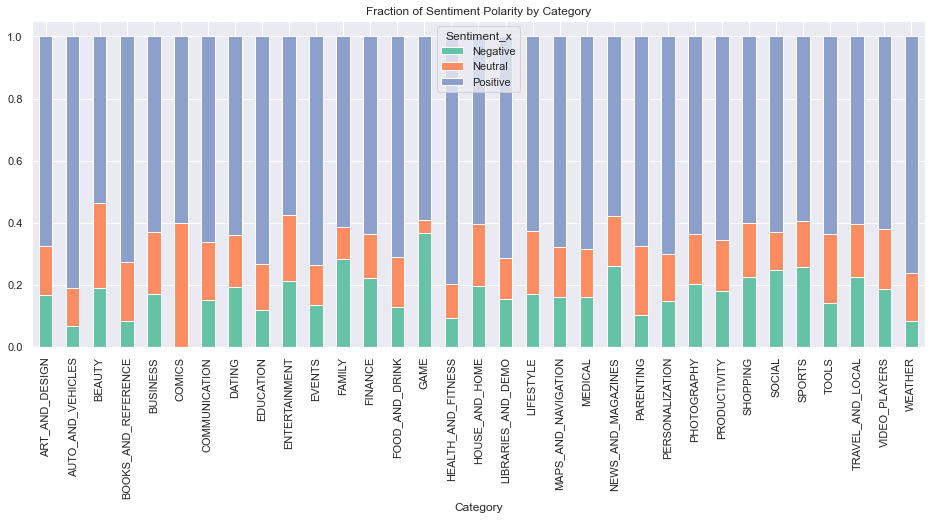

In [35]:
new_df_stack = new_df.pivot(index='Category', columns='Sentiment_x', values='normalized_sentiment_counts')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='bar', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)

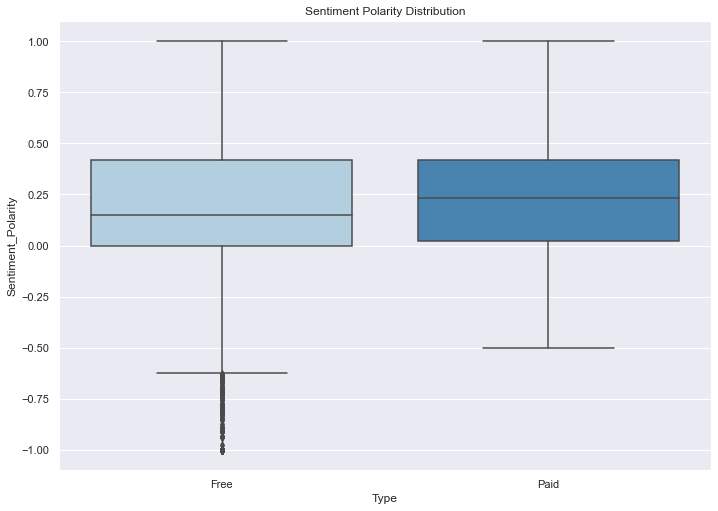

In [36]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

Plotted the fraction of positive, negative and neutral reviews for each category and observed that the Health and Fitness apps perform the best with more than 85% positive reviews. On the other hand, Game and Social apps have a higher fraction of negative reviews. Compared the reviews between free and paid apps and found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.

#### Frequency of Words in Reviews (Positive, Negative and Neutral)

In [37]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=250, colormap="Set2")
from nltk import sent_tokenize, word_tokenize

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','please','love','it','the','i',
              'I','my','like','really','every','would','even','though','game','review']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darsini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/darsini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 300,  max_font_size = 50, )
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title('Common Phrases in Reviews')

In [39]:
def pair_split(x):
    words = re.sub('[^A-Za-z_]+', ' ', x)
    words = words.split()
    words_new = [x for x in words if x not in stop]
    if len(words_new) == 1:
        return words_new
    else:
        pairs = [words_new[i]+'_'+words_new[i+1] for i in range(len(words_new)-1)]
        return pairs

In [40]:
## Frequency of words in translated review column
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

top_N = 100

## Get every pair of words from the reviews

pos_review_lower = merged_df[merged_df['Sentiment']=='Positive']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')
neg_review_lower = merged_df[merged_df['Sentiment']=='Negative']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')
neu_review_lower = merged_df[merged_df['Sentiment']=='Neutral']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')

pos_review_lower_rem = pos_review_lower.split(' ')
pos_review_lower_rem = [a for a  in pos_review_lower_rem if a.find('_') >0]
pos_review_remove_pun = " ".join(pos_review_lower_rem)

neg_review_lower_rem = neg_review_lower.split(' ')
neg_review_lower_rem = [a for a  in neg_review_lower_rem if a.find('_') >0]
neg_review_remove_pun = " ".join(neg_review_lower_rem)

neu_review_lower_rem = neu_review_lower.split(' ')
neu_review_lower_rem = [a for a  in neu_review_lower_rem if a.find('_') >0]
neu_review_remove_pun = " ".join(neu_review_lower_rem)

In [41]:
pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)
neu_word_tokens_tags = word_tokenize(neu_review_remove_pun)
pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        
neu_filtered_sentence_tags = [w_tags for w_tags in neu_word_tokens_tags if not w_tags in stop]
neu_filtered_sentence_tags = []
for w_tags in neu_word_tokens_tags:
    if w_tags not in stop:
        neu_filtered_sentence_tags.append(w_tags)

In [42]:
# Remove characters which have length less than 2  
pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]
neu_without_single_chr_rev = [word_tags for word_tags in neu_filtered_sentence_tags if len(word_tags) > 2]

In [43]:
from collections import Counter
counts = Counter(neg_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('waste_time', 137),
 ('long_time', 65),
 ('many_ads', 64),
 ('worst_ever', 57),
 ('google_play', 48),
 ('give_stars', 46),
 ('angry_birds', 42),
 ('gift_card', 42),
 ('last_update', 39),
 ('spend_money', 37)]

Text(0.5, 1.0, 'Common Phrases in Negative Reviews')

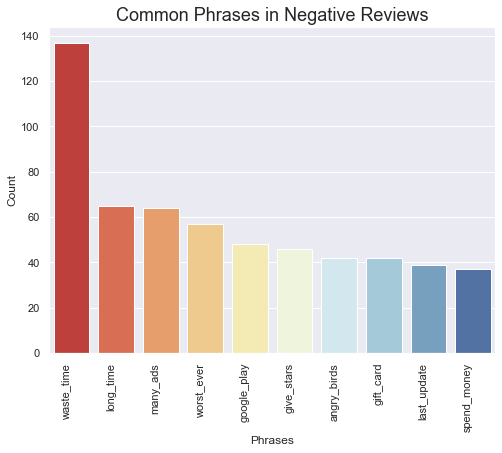

In [44]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "RdYlBu")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Negative Reviews',size = 18)

In [45]:
from collections import Counter
counts = Counter(pos_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('many_ads', 244),
 ('free_version', 107),
 ('much_better', 105),
 ('best_ever', 104),
 ('user_friendly', 96),
 ('works_great', 95),
 ('highly_recommend', 93),
 ('first_time', 90),
 ('wish_could', 89),
 ('way_many', 86)]

Text(0.5, 1.0, 'Common Phrases in Positive Reviews')

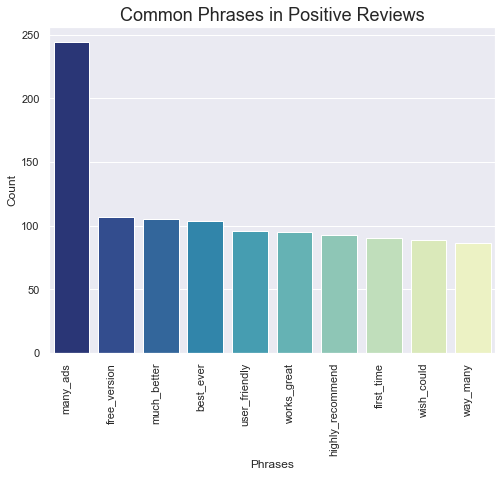

In [46]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "YlGnBu_r")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Positive Reviews',size = 18)

Extracted phrases from the reviews and observed that positive reviews had phrases like “user friendly”, “free version”, “works great” and “highly recommend”. The negative reviews contained phrases like “waste time”, “many ads”, “spend money” and “takes forever”. We can see that loading time and ads were one of the main concerns amongst users. On the other hand, usability is one of the reasons that users give positive reviews.